## Catagorical data  
#### Handling Missing Values,Normalization

In [1]:
#pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 

%matplotlib inline

In [3]:
sb.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
tip=sb.load_dataset('tips')
t=tip.tail(15)
t

,total_bill,tip,sex,smoker,day,time,size
229,22.12,2.88,Female,Yes,Sat,Dinner,2
230,24.01,2.00,Male,Yes,Sat,Dinner,4
231,15.69,3.00,Male,Yes,Sat,Dinner,3
232,11.61,3.39,Male,No,Sat,Dinner,2
233,10.77,1.47,Male,No,Sat,Dinner,2
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3


In [5]:
new_data=t.smoker.map({'Yes':'Y','No':'N'})
new_data

229    Y
230    Y
231    Y
232    N
233    N
234    Y
235    N
236    Y
237    Y
238    N
239    N
240    Y
241    Y
242    N
243    N
Name: smoker, dtype: category
Categories (2, object): ['Y', 'N']

In [6]:
data2=t.sex.map({'Female':'F','Male':'M'})
data2

229    F
230    M
231    M
232    M
233    M
234    M
235    M
236    M
237    M
238    F
239    M
240    F
241    M
242    M
243    F
Name: sex, dtype: category
Categories (2, object): ['M', 'F']

### Missing Values

In [7]:
data=pd.DataFrame({'Name':['Glad','Sakthi','Hasan','Hanlala','Anash'], 'Salary':[3000000,1500000,5000000,2500000,2000000],'pay_scale':['Avg','Low','High','Avg','Mid']})
data

,Name,Salary,pay_scale
0,Glad,3000000,Avg
1,Sakthi,1500000,Low
2,Hasan,5000000,High
3,Hanlala,2500000,Avg
4,Anash,2000000,Mid


In [8]:
data2=pd.DataFrame({'Salary':[3000000,1500000,5000000,2500000,2000000],
                  'Age':[20,20,20,19,19]})
data2

,Salary,Age
0,3000000,20
1,1500000,20
2,5000000,20
3,2500000,19
4,2000000,19


In [9]:
data3=pd.DataFrame({'Salary':[3000000,'NaN',5000000,2500000,'NaN'],
                  'Age':['Nan',20,20,'NaN',19]})
data3

,Salary,Age
0,3000000,Nan
1,NaN,20
2,5000000,20
3,2500000,NaN
4,NaN,19


In [10]:
imputer=SimpleImputer(missing_values=np.NaN,strategy='mean')
imputer.fit(data3)

SimpleImputer()

In [11]:
i=imputer.transform(data3)
i

array([[3.00000000e+06, 1.96666667e+01],
       [3.50000000e+06, 2.00000000e+01],
       [5.00000000e+06, 2.00000000e+01],
       [2.50000000e+06, 1.96666667e+01],
       [3.50000000e+06, 1.90000000e+01]])

In [12]:
imputer2=SimpleImputer(missing_values=np.NaN,strategy='median')
imputer2.fit(data3)

SimpleImputer(strategy='median')

In [13]:
i2=imputer2.transform(data3)
i2

array([[3.0e+06, 2.0e+01],
       [3.0e+06, 2.0e+01],
       [5.0e+06, 2.0e+01],
       [2.5e+06, 2.0e+01],
       [3.0e+06, 1.9e+01]])

In [14]:
imputer3=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
imputer3.fit(data3)

SimpleImputer(strategy='most_frequent')

In [15]:
i3=imputer3.transform(data3)
i3

array([[3000000, 'Nan'],
       ['NaN', 20],
       [5000000, 20],
       [2500000, 'NaN'],
       ['NaN', 19]], dtype=object)

In [16]:
imputer4=SimpleImputer(missing_values=np.NaN,strategy='constant')
imputer4.fit(data3)

SimpleImputer(strategy='constant')

In [17]:
i4=imputer4.transform(data3)
i4

array([[3000000, 'Nan'],
       ['NaN', 20],
       [5000000, 20],
       [2500000, 'NaN'],
       ['NaN', 19]], dtype=object)

## NORMALIZATION

In [18]:
from mpl_toolkits.mplot3d import Axes3D

In [19]:
data1=pd.DataFrame({'x':np.random.randint(-100,100,200),'y':np.random.randint(-50,50,200),'z':np.random.randint(-700,700,200)})

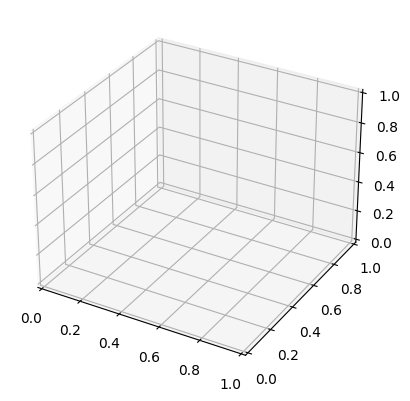

In [20]:
pl=plt.axes(projection='3d')

<Figure size 640x480 with 0 Axes>

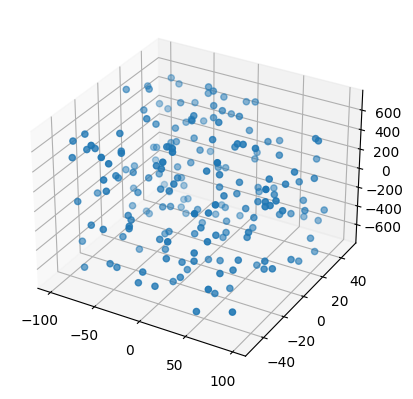

<Figure size 640x480 with 0 Axes>

In [21]:
pl=plt.axes(projection='3d')
pl.scatter3D(data1.x,data1.y,data1.z)
plt.figure()

In [22]:
from sklearn.preprocessing import Normalizer

In [23]:
N = Normalizer()

In [24]:
data2 = N.fit_transform(data1)
data2

array([[ 0.30614669,  0.01669891, -0.95183788],
       [ 0.99047667,  0.06830874, -0.11954029],
       [-0.52578392, -0.14478108,  0.83820625],
       [ 0.14675129,  0.15687207, -0.97665512],
       [ 0.19432721, -0.0485818 ,  0.979733  ],
       [-0.08560835, -0.06010799,  0.99451407],
       [-0.45996164,  0.23487403,  0.85631156],
       [-0.56816671, -0.10061285, -0.81673964],
       [-0.05602118,  0.09544349,  0.99385722],
       [ 0.13826294,  0.14947345, -0.9790511 ],
       [-0.07821663, -0.01073562,  0.99687858],
       [-0.18360712,  0.06120237,  0.9810926 ],
       [-0.45542417, -0.3058819 , -0.8360772 ],
       [-0.30818975,  0.12073413, -0.94363253],
       [-0.15254123,  0.07052982, -0.98577721],
       [-0.27200816,  0.81602448, -0.5100153 ],
       [ 0.24109951,  0.01205498,  0.97042553],
       [-0.54362891,  0.21572576,  0.81112885],
       [-0.12958389,  0.06911141,  0.98915703],
       [ 0.01763509, -0.03233099, -0.99932163],
       [ 0.42323347, -0.05771366,  0.904

In [25]:
DF = pd.DataFrame(data2,columns=['x1','y1','z1'])
DF

,x1,y1,z1
0,0.306147,0.016699,-0.951838
1,0.990477,0.068309,-0.119540
2,-0.525784,-0.144781,0.838206
3,0.146751,0.156872,-0.976655
4,0.194327,-0.048582,0.979733
...,...,...,...
195,0.122381,0.091786,0.988230
196,-0.037517,0.059586,0.997518
197,-0.023733,0.047465,-0.998591
198,-0.183881,0.010945,-0.982888


<Figure size 640x480 with 0 Axes>

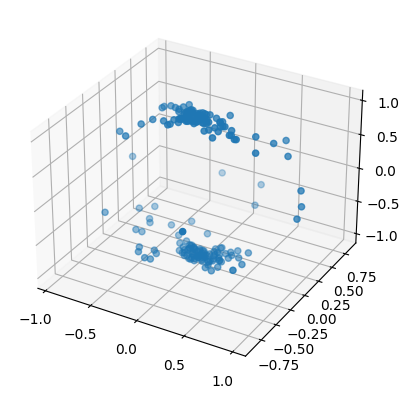

<Figure size 640x480 with 0 Axes>

In [26]:
pl=plt.axes(projection='3d')
pl.scatter3D(DF.x1,DF.y1,DF.z1)
plt.figure()